### Data transformation and visualization note book
#### Section micro ------------ update 18 april 2018
### Solved for varying dilutions and number of samples
#### After meeting with the CSO,  we have decided to use the AVERAGE of the 48hour EZ gel counts and the UV results 
1. Change the variables (limit to 48 hours)
2. Add the uv reslults to the 48 hour variable
3. Caluclate the average for the listed variables
4. Create a combined results graph
5. Export all descriptive stats and results to an exploitable format

#### This will be added as new function at the begining of notebook
1. keep the other functions for reference and to produce grids for annex
2. Make sure output is good for Js

#### Section micro ------------ update 21 april 2018

1. the charts and plots are completed for 2017
2. need to add the rain data
3. need to integrate the 2016 data
4. call it good

##### turn the music up and put the headphones on ---

#### Section micro ----------- update 23 april 2018

1. 2016 data included (rain and colony counts)
2. put the processes in a more logical order
3. Section subtitles to identify processes
4. 2016 -- grids and charts completed




In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Import the data and clean it up

In [7]:
# get the data
a = pd.read_csv('data/forReview_RAoctB.csv')

In [8]:
# this is a duplicate value in the DF, data was moved(added as a record)
a.drop(12, inplace=True)
a.drop(38, inplace=True)

In [9]:
# this is "record data" each row corresponds to an event:
### each event is a water sample from a location on particular day
#### for each event there are three samples, those three samples get split between three selective medium plates
##### each plate can have a total result of x_total = x1 + x2 +...+ x6
###### x1 ... x6 are subtotals that can be compared across dates and/or locations
# do the steps to get the descriptive statistics
# create output that can be used by : javaScript, django, bokeh
### at a granularity appropriate to establish an accurate assesment of the laboratory results
a_cols = list(a.columns)
def print_this_list(a):
    for x in a:
        print(x)
print(a_cols)
#check the columns

['Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation', 'P1_qty_sample', 'Image_24h_fluo_plate_one', 'P1_fluo_halo_colonies', 'P1_fluo_other', 'Plate_one_24h_image', 'P1_24h_big_blue', 'P1_24h_med_blue', 'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other', 'Comments_p1_24h', 'Plate_one_48h_image', 'P1_48h_big_blue', 'P1_48h_med_blue', 'P1_48h_green', 'P1_48h_turq', 'P1_48h_pink', 'P1_48h_other', 'Comments_p1_48h', 'P2_qty_sample', 'Image_24h_fluo_plate_two', 'P2_fluo_halo_colonies', 'P2_fluo_other', 'Plate_two_24h_image', 'P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink', 'P2_24h_other', 'Comments_p2_24h', 'Plate_two_48h_image', 'P2_48h_big_blue', 'P2_48h_med_blue', 'P2_48h_green', 'P2_48h_turq', 'P2_48h_pink', 'P2_48h_other', 'Comments_p2_48h', 'P3_qty_sample', 'Image_24h_fluo_plate_three', 'p3_fluo_halo_colonies', 'p3_fluo_other', 'Plate_three_24h_image', 'P3_24h_big_blue', 'P3_24h_med_blu

In [10]:
# go in a terminal and check the date column
# it is in %y%.m%.d format
# for whatever reason the pd,datetime did not recognize the date 17.06.12
# it flipped it to : 17.12.06 ---- which won't work
# so use some list index and str properties to make this right
b = a['Date'].copy()
new_dates = []
new_dic = {}
for x in b:
    year = '20'+str(x[6:])
    day = x[:2]
    month = x[3:5]
    new_d = year + '/' + str(month) + '/' + str(day)
    new_dates.append({x:new_d})
    new_dic.update({x:new_d})
new_dates[:10]

a['Date'] = a['Date'].map(new_dic)
#a['Date'][:10]

In [11]:
# make sure the orignal df is up to speed
a['Date'] = pd.to_datetime(a['Date'],format='%Y/%m/%d' )

#### 2016 data

In [12]:
a16 = pd.read_csv('data/2016_clean.csv')

In [13]:
a16.drop('Unnamed: 0', axis=1, inplace=True)
a16['Date'] = pd.to_datetime(a16['Date'],format='%Y-%m-%d' )

### There are two time periods (24/48 hours), break those up and export the data as a csv

### 48 hour results

In [14]:
a_b = a[['Date',
       'Location',
       'medium',
       'Samples',
       'Sampling_Notes',
       'Water_temp',
       'Plating_notes',
       'Temp_incubation',
       'P1_qty_sample',
       'P1_fluo_halo_colonies',
       'Plate_one_48h_image',
       'P1_48h_big_blue',
       'P1_48h_med_blue',
       'P1_48h_green',
       'P1_48h_turq',
       'P1_48h_pink',
       'P1_48h_other',
       'Comments_p1_48h',
       'P2_qty_sample',
       'P2_fluo_halo_colonies',
       'Plate_two_48h_image',
       'P2_48h_big_blue',
       'P2_48h_med_blue',             
       'P2_48h_green',
       'P2_48h_turq',
       'P2_48h_pink',
       'P2_48h_other',
       'Comments_p2_48h',
       'P3_qty_sample',
       'p3_fluo_halo_colonies',
       'Plate_three_48h_image',
       'P3_48h_big_blue',
       'P3_48h_med_blue',
       'P3_48h_green',
       'P3_48h_turq',
       'P3_48h_pink',
       'P3_48h_other',
       'Comments_p3_48h']].copy()


In [15]:
# plate three 'fluo colony' does not match the others
# fix that and export the CSV
a_b.rename(columns={'p3_fluo_halo_colonies':'P3_fluo_halo_colonies'}, inplace=True)
a_b.to_csv('data/fluo_48h.csv')

In [16]:
a_b.reset_index(inplace=True)

In [17]:
a_b.drop('index', inplace=True, axis=1)

In [18]:
a_b[(a_b.Location == 'MRD') & (a_b.Date == '2017-07-24')]
# this record needs to go or we need to reset the sample number
# check the sampling notes to see why
# so even though the sampling was ineffective there is still a value in the samples column

,Date,Location,medium,Samples,Sampling_Notes,Water_temp,Plating_notes,Temp_incubation,P1_qty_sample,P1_fluo_halo_colonies,...,P3_qty_sample,P3_fluo_halo_colonies,Plate_three_48h_image,P3_48h_big_blue,P3_48h_med_blue,P3_48h_green,P3_48h_turq,P3_48h_pink,P3_48h_other,Comments_p3_48h
43,2017-07-24,MRD,easy_gel,3,"Waves at sight, sampling not effective",0,No comments,37,4.0,0,...,4.0,0.0,none,0.0,0.0,0.0,0.0,0.0,0.0,No comments


In [19]:
# go ahead and change that now
a_b.iloc[43, 3] = 0
a_b[(a_b.Location == 'MRD') & (a_b.Date == '2017-07-24')]

,Date,Location,medium,Samples,Sampling_Notes,Water_temp,Plating_notes,Temp_incubation,P1_qty_sample,P1_fluo_halo_colonies,...,P3_qty_sample,P3_fluo_halo_colonies,Plate_three_48h_image,P3_48h_big_blue,P3_48h_med_blue,P3_48h_green,P3_48h_turq,P3_48h_pink,P3_48h_other,Comments_p3_48h
43,2017-07-24,MRD,easy_gel,0,"Waves at sight, sampling not effective",0,No comments,37,4.0,0,...,4.0,0.0,none,0.0,0.0,0.0,0.0,0.0,0.0,No comments


### 24 hour results

In [20]:
a_24 = ['Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation', 'P1_qty_sample', 'P1_fluo_halo_colonies', 'Plate_one_24h_image', 'P1_24h_big_blue', 'P1_24h_med_blue', 'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other', 'Comments_p1_24h','P2_qty_sample','P2_fluo_halo_colonies', 'Plate_two_24h_image', 'P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink', 'P2_24h_other', 'Comments_p2_24h', 'P3_qty_sample', 'p3_fluo_halo_colonies', 'Plate_three_24h_image', 'P3_24h_big_blue', 'P3_24h_med_blue', 'P3_24h_green', 'P3_24h_turq', 'P3_24h_pink', 'P3_24h_other', 'Comments_p3_24h']

In [21]:
a24 = a[a_24].copy()

In [22]:
# plate three 'fluo colony' does not match the others
# fix that and export the CSV
a24.rename(columns={'p3_fluo_halo_colonies':'P3_fluo_halo_colonies'}, inplace=True)
a24.to_csv('data/fluo_24h.csv')

In [23]:
a24.reset_index(inplace=True)

In [24]:
a24.drop('index', inplace=True, axis=1)

In [25]:
a24[(a24.Location == 'MRD') & (a24.Date == '2017-07-24')]

,Date,Location,medium,Samples,Sampling_Notes,Water_temp,Plating_notes,Temp_incubation,P1_qty_sample,P1_fluo_halo_colonies,...,P3_qty_sample,P3_fluo_halo_colonies,Plate_three_24h_image,P3_24h_big_blue,P3_24h_med_blue,P3_24h_green,P3_24h_turq,P3_24h_pink,P3_24h_other,Comments_p3_24h
43,2017-07-24,MRD,easy_gel,3,"Waves at sight, sampling not effective",0,No comments,37,4.0,0,...,4.0,0.0,none,0.0,0.0,0.0,0.0,0.0,0.0,No comments


In [26]:
# go ahead and change that now
a24.iloc[43, 3] = 0
a24[(a24.Location == 'MRD') & (a24.Date == '2017-07-24')]

,Date,Location,medium,Samples,Sampling_Notes,Water_temp,Plating_notes,Temp_incubation,P1_qty_sample,P1_fluo_halo_colonies,...,P3_qty_sample,P3_fluo_halo_colonies,Plate_three_24h_image,P3_24h_big_blue,P3_24h_med_blue,P3_24h_green,P3_24h_turq,P3_24h_pink,P3_24h_other,Comments_p3_24h
43,2017-07-24,MRD,easy_gel,0,"Waves at sight, sampling not effective",0,No comments,37,4.0,0,...,4.0,0.0,none,0.0,0.0,0.0,0.0,0.0,0.0,No comments


### Need to be able to group results by date, location, plate number, color, medium and (time)
### Create indexes that can be called in a function

#### Date groupings, by week 2017

In [27]:
# group the dates by week number
# first get a sorted list by date
# any way you do it there is a transformation to happen
b = a['Date'].copy()
b = pd.to_datetime(b, format='%Y/%m/%d')
b = list(b)
b.sort()
b = list(set(b))
b.sort()
b
# the time stamp works here but it is a hassel in js
# the value will be kept but I will also asign a week #

[Timestamp('2017-06-12 00:00:00'),
 Timestamp('2017-06-19 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-17 00:00:00'),
 Timestamp('2017-07-24 00:00:00'),
 Timestamp('2017-07-31 00:00:00')]

In [28]:
weeks_l = ['Week one', 'Week two', 'Week three', 'Week four', 'Week five', 'Week six', 'Week seven', 'Week eight']
weeks = dict(zip(weeks_l, b))
print(weeks, b)

{'Week one': Timestamp('2017-06-12 00:00:00'), 'Week two': Timestamp('2017-06-19 00:00:00'), 'Week three': Timestamp('2017-06-26 00:00:00'), 'Week four': Timestamp('2017-07-03 00:00:00'), 'Week five': Timestamp('2017-07-10 00:00:00'), 'Week six': Timestamp('2017-07-17 00:00:00'), 'Week seven': Timestamp('2017-07-24 00:00:00'), 'Week eight': Timestamp('2017-07-31 00:00:00')} [Timestamp('2017-06-12 00:00:00'), Timestamp('2017-06-19 00:00:00'), Timestamp('2017-06-26 00:00:00'), Timestamp('2017-07-03 00:00:00'), Timestamp('2017-07-10 00:00:00'), Timestamp('2017-07-17 00:00:00'), Timestamp('2017-07-24 00:00:00'), Timestamp('2017-07-31 00:00:00')]


In [29]:
# weeks has the key type 'Week one', 'Week two'....
# Will need to call the week be by date
# so weeks 2 has the key type Timestamp('2017-06-12 00:00:00')
weeks_2 = dict(zip(b, weeks_l))

#### Date groupings, by week 2016

In [30]:
b_2016 = a16['Date'].copy()
b_2016 = pd.to_datetime(b_2016,format='%Y-%m-%d' )
b_2016 = list(b_2016)
b_2016.sort()
b_2016 = list(set(b_2016))
b_2016.sort()
b_2016

[Timestamp('2016-06-21 00:00:00'),
 Timestamp('2016-06-28 00:00:00'),
 Timestamp('2016-07-05 00:00:00'),
 Timestamp('2016-07-12 00:00:00'),
 Timestamp('2016-07-19 00:00:00'),
 Timestamp('2016-07-26 00:00:00'),
 Timestamp('2016-08-02 00:00:00'),
 Timestamp('2016-08-09 00:00:00')]

In [31]:
weeks_2016 = dict(zip(weeks_l, b_2016))
dates_2016 = dict(zip(b_2016, weeks_l))

#### Mediums used to culture bacteria

In [32]:
# a list of mediums is important
mediums = list(a['medium'].unique().copy())
mediums

['easy_gel', 'micrology_card', 'unil_kitchen', 'levine']

#### Locations of interest

In [33]:
places_48 = ['MRD', 'VNX', 'SVT']

#### Group by plate number, this is  also used when the number of samples equals the number of plates
#### example: one sample = plate one ... 
#### 48 hour groups

In [34]:
# create plate variables
p_one_48 = ['P1_fluo_halo_colonies','P1_48h_big_blue','P1_48h_med_blue','P1_48h_green',
            'P1_48h_turq','P1_48h_pink','P1_48h_other']
p_two_48 = ['P2_fluo_halo_colonies','P2_48h_big_blue','P2_48h_med_blue',
            'P2_48h_green','P2_48h_turq','P2_48h_pink','P2_48h_other']
p_three_48 = ['P3_fluo_halo_colonies','P3_48h_big_blue','P3_48h_med_blue',
              'P3_48h_green','P3_48h_turq','P3_48h_pink','P3_48h_other']
# create key for charting
import re
q = re.compile('fluo_halo', re.IGNORECASE)
def make_keys(a):
    f={}
    for h in a:
        for b, c in enumerate(h):
            if q.search(h[b]):
                d = 'UV Fluo'
                e = {h[0]:d}
                f.update(e)
            else:
                d = h[b][7:]
                e = {h[b]:d}
                f.update(e)
    return f
colony_map = make_keys([p_one_48, p_two_48, p_three_48])        
# this may come in hand later

#### Create user friendly names mapped to orignal dataframe column names

In [35]:
# the 'map' can be used to convert
# column names to something more concise
# can use index location or counts to call labels
# so that means that
colony_map[p_two_48[1]]

'big_blue'

#### Test that the same index number calls the same color group across all plates

In [36]:
# to check that the same color group is called for each plate
# grab a random number and use it to
# index the lists created from the columns
# these will be used as lables later to call data out
# the out pt should be the same for all values x[i] where i = np.random.choice(6)
plates_four_eight =  [p_one_48, p_two_48, p_three_48]
plates_2four_eight = [p_one_48, p_two_48]
plates_1four_eight = [p_one_48]
def check_indexes(a):
    n = 0
    i = np.random.choice(6)
    if n <= 4:        
        for x in a:
            print(x[i])
        print('loop')
        n += 1
        
check_indexes(plates_four_eight)
# okay this function can run forever and i get the same color output from each group     

P1_48h_med_blue
P2_48h_med_blue
P3_48h_med_blue
loop


#### 48 hour color groups,
#### Ensure taht with one index call all the results for a particular species can be collected

In [37]:
# use the above property to make color groups
# each color represents a type/family of bacteria
# we need two calculate the results per color group
# in the preceding step they are grouped by plate
a_number = np.arange(len(plates_four_eight[0]))
def make_groups(x, q):
    b=[]
    for s in x:
        a = []
        for y in q:
            a.append(y[s])
        b.append(a)
    return b
three_plate_48 = make_groups(a_number, plates_four_eight)
two_plate_48 = make_groups(np.arange(len(plates_2four_eight[0])), plates_2four_eight)
one_plate_48 = make_groups(np.arange(len(plates_1four_eight[0])), plates_1four_eight)

# take a look
# they should all be the same group:
three_plate_48[1]
# perfect now I can call a color group by the number of samples

['P1_48h_big_blue', 'P2_48h_big_blue', 'P3_48h_big_blue']

### 24 hour groups
### Re-use the functions from the 48 hour group

In [38]:
p_one_24 = ['P1_fluo_halo_colonies', 'P1_24h_big_blue','P1_24h_med_blue',
            'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other']
p_two_24 = ['P2_fluo_halo_colonies','P2_24h_big_blue','P2_24h_med_blue',
            'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink','P2_24h_other',]
p_three_24 = ['P3_fluo_halo_colonies', 'P3_24h_big_blue', 'P3_24h_med_blue',
              'P3_24h_green', 'P3_24h_turq', 'P3_24h_pink','P3_24h_other']

colony_map_24 = make_keys([p_one_24, p_two_24, p_three_24] )


In [39]:
plates_two_four = [p_one_24, p_two_24, p_three_24]
plates_2four_four = [p_one_24, p_two_24]
plates_1four_four = [p_one_24]
check_indexes(plates_two_four)

P1_24h_big_blue
P2_24h_big_blue
P3_24h_big_blue
loop


In [40]:
three_plate_24 = make_groups(np.arange(len(plates_two_four[0])), plates_two_four)
two_plate_24 = make_groups(np.arange(len(plates_2four_four[0])), plates_2four_four)
one_plate_24 = make_groups(np.arange(len(plates_1four_four[0])), plates_1four_four)

# take a look
# they should all be the same group:
three_plate_24[1]
# perfect now I can call a color group by the number of samples

['P1_24h_big_blue', 'P2_24h_big_blue', 'P3_24h_big_blue']

### 2016 groups

In [41]:
p_one_2016 = ['P1_24h_big_blue','P1_24h_med_blue','P1_24h_turq', 'P1_24h_pink', 'P1_24h_other']
p_two_2016 = ['P2_24h_big_blue','P2_24h_med_blue','P2_24h_turq', 'P2_24h_pink','P2_24h_other',]
p_three_2016 = ['P3_24h_big_blue', 'P3_24h_med_blue','P3_24h_turq', 'P3_24h_pink','P3_24h_other']

In [42]:
# make some keys for the 2016 data
# there is no fluo
def make_keys_16(a):
    f={}
    for h in a:
        for b, c in enumerate(h):
            d = h[b][7:]
            e = {h[b]:d}
            f.update(e)
    return f

In [43]:
colony_map_16 = make_keys_16([p_one_2016, p_two_2016, p_three_2016])

In [44]:
plates_16 = [p_one_2016, p_two_2016, p_three_2016]
three_plate_16 = make_groups(np.arange(len(plates_16[0])), plates_16)

In [45]:
colony_map_16[p_two_2016[1]]

'med_blue'

In [46]:
three_plate_16[1] 

['P1_24h_med_blue', 'P2_24h_med_blue', 'P3_24h_med_blue']

In [47]:
# okay good to go

## Rain data 2017

In [48]:
# we need to add rain values for the sampling period
# let's see what we got from the CSO
aa = pd.read_csv('data/rainfall.csv')
aa.iloc[:2]
# actually this came as a table embedded in a word doc
# try incorporating that into you analysis

,06/01/18,76°/58°,0 IN,0 IN.1,
0,06/02/18,78°/56°,0 IN,0 IN,
1,06/03/18,78°/58°,0.42 IN,0 IN,


In [49]:
# either way this won't work
aa = pd.read_csv('data/rainfall.csv', header=None)
aa.iloc[:2]

,0,1,2,3,4
0,06/01/18,76°/58°,0 IN,0 IN,
1,06/02/18,78°/56°,0 IN,0 IN,


In [50]:
# the columns are in string format
# can't do math with that (the dates maybe)
# drop what we don't need
# this may not be the fastest way, but it is a direct route
bb = aa[[0, 2]].copy()

In [51]:
# type(bb[2][0]) ---> string
# so will split and catch only the number
cc = bb[2].str.split(expand=True)
# only need the first column of this new df
cc.rename(columns={0:'Rain'}, inplace=True)

In [52]:
dd = pd.concat([bb, cc], axis=1)

In [53]:
dd.drop([2,1], axis=1, inplace=True)

In [54]:
dd['Rain'] = dd['Rain'].astype(float)
print(dd.iloc[:3], type(dd['Rain'][0]), type(dd[0][0]))
# okay the date column is all that is left to do
# notice the dates are given as 2018
# that is because the original file has the dates as day/month
# the spreadsheet software defaults to the current year

          0  Rain
0  06/01/18  0.00
1  06/02/18  0.00
2  06/03/18  0.42 <class 'numpy.float64'> <class 'str'>


In [55]:
# first rename the column
dd.rename(columns={0:'Date'}, inplace=True)
# check again before we go down some long road
dd['Date'][0]

'06/01/18'

In [56]:
# see how this converts using datetime method
pd.to_datetime(dd['Date'][0])
# if i am lucky it will give me the year

Timestamp('2018-06-01 00:00:00')

In [57]:
dd['Date'] = pd.to_datetime(dd['Date'])
# so there are a couple of methods i can use
dd['real_date'] = dd['Date'] - pd.Timedelta(days=365)

In [58]:
dd['real_date'][0]
# yay it is done

Timestamp('2017-06-01 00:00:00')

In [59]:
# now i can get the dates i need for the study
# first get rid of some columns
dd.drop('Date', axis=1, inplace=True)

In [60]:
dd.columns

Index(['Rain', 'real_date'], dtype='object')

In [61]:
# use the date list created at the begining
# to define the date range
dd_d = 'real_date'
# give this a shot
# dd[(dd[dd_d] >= b[0]) & (dd[dd_d] <= b[7])]
# that will work
# therefore
d_rain = dd[(dd[dd_d] >= '2017-06-05') & (dd[dd_d] <= b[7])]
# move the columns around
d_rain = d_rain[[dd_d, 'Rain']]
# take a look
d_rain.iloc[:4]
# we are in business

,real_date,Rain
4,2017-06-05,0.00
5,2017-06-06,0.57
6,2017-06-07,0.00
7,2017-06-08,0.00


### 2016 rain data

In [62]:
rain_2016 = pd.read_csv('data/rainfall2016.csv', header=None)

In [63]:
rain_2016.rename(columns={0:'Date', 1:'Rain'}, inplace=True)

In [64]:
rain_2016.iloc[:5]

,Date,Rain
0,2016-6-21,0.00
1,2016-06-22,0.00
2,2016-06-23,0.00
3,2016-06-24,1.66
4,2016-06-25,7.36


### Get and sort the data to calculate the 95th percentile and daily average
1. Use the tools developed above
2. Makes sure that number of samples and nul samples are accounted for
3. Account for 'Below Detectable Limit' and 'Too many to count'
4. Calculate the 95th percentile or average
5. Group results so they can be passed to a plotting function

### The results of these functions get passed on to plotting functions and bar graph functions

#### Get the 95th percentile for specified places and mediums

In [65]:
# import regex to look for string entries
# in particulat 'tmtc' --> 'to many to count'

import re
# create the variable and compile the regex
p = re.compile('tmtc', re.IGNORECASE)
# the fucntion
def forty_eight(df, week, places, meds):
    # holder for results
    all_results = []
    # get the values from the df by place name
    # call the place from the list created prior
    for n, place in enumerate(places):
        # this dict will be called in the charting fucntion
        # the place name is the dict key
        chart_it = {place:[]}
        # this list will hold all the results in the form of dictionairies
        the_results = []
        # check the results per week
        for a, b in enumerate(week):
            # use the date map to grab weekly results
            # here output or selection is limited to one location, one week
            e = df[(df.Date == weeks[week[a]]) & (df.Location == place) & (df.medium == meds)]
            # check if a samole was taken or not
            # if not return a string and store that in a dictionary 'no_test'
            # if there is no row entry for e['Samples'] this statement will create the dict
            if e['Samples'].values[0] == 0:
                no_t = meds + ' not used'
                no_test = {'no_test': no_t}
                the_results.append([{weeks_2[weeks[b]]:no_test}]) 
            
            # depending on how many samples were taken
            # assign the appropriate list 
            # e['Samples'] has a value from one to three (if it has a value)
            elif e['Samples'].values[0] == 1:
                # these were defined earlier
                samples = one_plate_48
                num_samps = 1       
                
            elif e['Samples'].values[0] == 2:
                samples = two_plate_48
                num_samps = 2
                            
            elif e['Samples'].values[0] == 3:
                samples = three_plate_48
                num_samps = 3
            
            # do this only if the number of samples taken is greater than zero
            if e['Samples'].values[0] > 0:
                # check the comments in the df
                # this is where 'tmtc' would be hiding
                comments = list(e['Comments_p1_48h'])
                # grab the number of samples for this day 
                samps = {'num samps': num_samps}
                # grab the dilution amount from the df
                dose = {'dilution': e['P1_qty_sample'].item()}
                # test the comments 
                # if there is a results
                if len(comments) ==1:
                    # run that result against the regex
                    # if psotive then assign as 'tmtc'
                    # p is looking for a string of characters = 'tmtc'
                    if p.search(comments[0]):
                        bdl={'TMTC':''}
                    # if not open up a dict for 'BDL'
                    else:
                        bdl={'BDL':''}
                # place to store the daily numerical results
                day_results = []
                # place to store the resluts for 'tmtc'or 'bdl'
                string = []
                # check the results per color group
                for c, d in enumerate(samples):
                    f = e[d]
                    # if the the sum of a color group is zero
                    # assign it to 'bdl'
                    if sum(f.sum()) == 0:
                        for s in d:
                            # using our colony map to turn column names into
                            # user friendly labels
                            if colony_map[s] not in string:
                                string.append(colony_map[s])
                    # join all the bdl into a string, seperated by commas
                    # this will be printed on the x axis of each chart
                    bdl[list(bdl.keys())[0]] = ', '.join(string)
                    # e[d] is a series of values from one color group
                    # make that a list 
                    g = list(e[d].sum())
                    # place to store some results
                    g_l = []
                    # go through the results one by one
                    for h in g:
                        # we are taking the log, zero retruns -inf
                        # not good so we will keep the zero
                        if h == 0:
                            g_l.append(h)
                        # any number greater than zero gets transformed
                        if h > 0:
                            g_l.append(np.log(h))
                    # get the average of the results
                    g_m = np.mean(g_l)
                    # get the standard deviation
                    g_s = np.std(g_l)
                    # calculate the 95th and round it to something reasonbale
                    f_95 = g_m+ g_s*1.649
                    f_95 = np.exp(f_95).round(2)
                    # mutliply the value times the appropriate diltution factor
                    # this could be changed to dose['dilution'].value()
                    if e['P1_qty_sample'].item() == 0.5:
                        f_95 = f_95 * 200
                    elif e['P1_qty_sample'].item() == 1:
                        f_95 = f_95 * 100
                    elif e['P1_qty_sample'].item() == 4:
                        f_95 = f_95 * 25
                    # place the result in the daily resluts list
                    day_results.append(f_95)
                    # do this for each color group
                # move on to the next day
                # but first store the daily results, number of samples, bdl string and dose
                # for that day, indeitfy it with the date map constructed earlier
                the_results.append([{weeks_2[weeks[b]]:day_results}, bdl, samps, dose])
            # repeat the process for each place
            # store the result for each place in a dict with key 'place'
            chart_it[place] = the_results
        # put this all in an array that can be iterated
        all_results.append(chart_it)
    return all_results
               
                


#### Get the daily average per color group for specified location and medium

In [66]:
# this is the same function as above except the 95th percentile was replaced by the average
# not going to comment this out
p = re.compile('tmtc', re.IGNORECASE)
def forty_eight_av(df, week, places, meds, comment, one_plate, two_plate, three_plate, cmap):
    all_results2 = []
    for n, place in enumerate(places):
        chart_it2 = {place:[]}
        the_results2 = []
        for a, b in enumerate(week):
            e = df[(df.Date == weeks[week[a]]) & (df.Location == place) & (df.medium == meds)]
            
            if e['Samples'].values[0] == 0:
                no_t = meds + ' not used'
                no_test = {'no_test': no_t}
                the_results2.append([{weeks_2[weeks[b]]:no_test}]) 
                
            elif e['Samples'].values[0] == 1:
                samples = one_plate
                num_samps = 1       
                
            elif e['Samples'].values[0] == 2:
                samples = two_plate
                num_samps = 2
                            
            elif e['Samples'].values[0] == 3:
                samples = three_plate
                num_samps = 3
            
            if e['Samples'].values[0] > 0:
                comments = list(e[comment])
                samps = {'num samps': num_samps}
                dose = {'dilution': e['P1_qty_sample'].item()}
                if len(comments) ==1:
                    
                    if p.search(comments[0]):
                        bdl={'TMTC':''}
                    else:
                        bdl={'BDL':''}
                
                day_results2 = []
                string = []
                for c, d in enumerate(samples):
                    f = e[d]
                    if sum(f.sum()) == 0:
                        for s in d:
                            if cmap[s] not in string:
                                string.append(cmap[s])
                    bdl[list(bdl.keys())[0]] = ', '.join(string)
                    g = list(e[d].sum())
                    g_l = []
                    # this part here is for the 95th percentile
                    #for h in g:
                    #    if h == 0:
                    #        g_l.append(h)
                    #   if h > 0:
                    #       g_l.append(np.log(h))
                    g_m = np.mean(g)
                    f_95 = g_m
                    if f_95 == 0:
                        f_95 = f_95 +0.01
                    if e['P1_qty_sample'].item() == 0.5:
                        f_95 = f_95 * 200
                    elif e['P1_qty_sample'].item() == 1:
                        f_95 = f_95 * 100
                    elif e['P1_qty_sample'].item() == 4:
                        f_95 = f_95 * 25
                    day_results2.append(f_95)
                the_results2.append([{weeks_2[weeks[b]]:day_results2}, bdl, samps, dose])
            chart_it2[place] = the_results2
        all_results2.append(chart_it2)
    
   
    return all_results2

### need to make a simplified function for the 2016 data
1. There was always three samples per location per week
2. TMTC not stored as comments
3. There is no UV


In [67]:
def av_2016(df, week, places, three_plate, cmap):
    all_results2 = []
    for n, place in enumerate(places):
        chart_it2 = {place:[]}
        the_results2 = []
        for a, b in enumerate(week):
            e = df[(df.Date == weeks_2016[week[a]]) & (df.Location == place)]
            samples = three_plate
            num_samps = 3
            dose = {'dilution': e['P1_qty_sample'].item()}
            samps = {'num samps': num_samps}
            bdl={'BDL':''}
            day_results2 = []
            string = []
            for c, d in enumerate(samples):
                f = e[d]
                if sum(f.sum()) == 0:
                    for s in d:
                        if cmap[s] not in string:
                            string.append(cmap[s])
                bdl[list(bdl.keys())[0]] = ', '.join(string)
                g = list(e[d].sum())
                g_m = np.mean(g)
                f_95 = g_m
                if f_95 == 0:
                    f_95 = f_95 +0.01
                if e['P1_qty_sample'].item() == 0.4:
                    f_95 = f_95 * 250
                elif e['P1_qty_sample'].item() == 1:
                    f_95 = f_95 * 100
                elif e['P1_qty_sample'].item() == 4:
                    f_95 = f_95 * 25
                day_results2.append(f_95)
            the_results2.append([{dates_2016[weeks_2016[b]]:day_results2}, bdl, samps, dose])
        chart_it2[place] = the_results2
        all_results2.append(chart_it2)
    
   
    return all_results2

#### call the functions

In [68]:
two_four_2016 = av_2016(a16,weeks_l, places_48, three_plate_16, colony_map_16)
four_eight = forty_eight(a_b, weeks_l, places_48, mediums[0])  
four_eight_ave = forty_eight_av(a_b, weeks_l, places_48,mediums[0],'Comments_p1_48h', one_plate_48, two_plate_48, three_plate_48, colony_map)

### Chart all the results per week per location with totals for each color group
1. use a grid format, with bar charts for daily results
2. Row is week number, column is location
3. include location, # of samples and amount plated in the title
4. indentify which color groups were 'below detectable limit'
5. identify the days where the results were 'too many to count'

### Get all the results in a grid so that results for color groups and locations can be compared



In [69]:
# will need this for the x axis labels
from textwrap import wrap
# start the function
def plot_ez_totals(x, svgtitle, pngtitle):
    # number of rows depends on the number of weeks
    rows = len(weeks_l)
    # the number of columns depends on the number of locations
    cols = len(x) +1
    # this is the number of bars in each chart
    # this depends on the number of color groups
    ind = np.arange(7)#<--- this can be made a variable
    # the width of each bar
    # width one means there is no space between bars
    width = 1
    # assign appropriate colors per grop
    # note the index number of each color matches the index number of the values from the first fucntion
    colss = ['darkviolet','darkblue', 'dodgerblue', 'green', 'turquoise', 'pink', 'lightslategray']
    # set up the figure and the array of charts
    f, axar = plt.subplots(rows, cols, figsize=(18,20))
    # create some space in between the rows for x axis labels, and titles
    f.subplots_adjust(hspace=0.9, wspace=0.3)
    # run through the results generated by the previous fucntion
    for i, n in enumerate(x):
        # indentify the first column
        # assign a special value 'week number'
        if i == 0:
            # the values are stored in a list of dicts
            # so calling x[i] gives a dict
            for key, value in x[i].items():
                # the key is the place name
                # the value is the list of results
                # run through the list of results
                for j, k in enumerate(value):
                    # if i is zero (the first set of results)
                    # then the week number needs to be printed first
                    # because the first column is the week indentifier
                    axar[j, i].text(0, 0.5, weeks_l[j], fontsize=14)
                    axar[j, i].set_axis_off()
                    # if object in value is a dict then print it out
                    # numerical values were stored in a list
                    if type(k[0][weeks_l[j]]) == dict:
                        axar[j, i+1].text(0.2, 0.5, k[0][weeks_l[j]]['no_test'], fontsize=10)
                        axar[j, i+1].set_title(key)
                        
                    # plot the numercal values in a bar chart
                    else:
                        # the i+1 shifts the column over..
                        # notice the values are called using the same variable as the week number column
                        # k[0][weeks_l[j]] <---- this is the list of color group averages per day
                        axar[j, i+1].bar(ind, k[0][weeks_l[j]], width, color=colss)
                        # the variable key is the place name,
                        # str(list(k[2].values())[0]) <--- this is the number of samples
                        # str(list(k[3].values())[0]) < ---- this is the dose 
                        axar[j, i+1].set_title(key + ', samples: ' + str(list(k[2].values())[0]) + ', ' + str(list(k[3].values())[0]) + 'mL')
                        # set the xaxis lable by calling any resluts below detectable limit
                        # list(k[1].values())[0] < ---- this the 'bdl' string
                        axis_label = '\n'.join(wrap(list(k[1].values())[0], 33))
                        axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                        # set the max and the ming for the axis
                        if max(k[0][weeks_l[j]]) == 25:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                        else:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
        # rinse and repeat for column values not equal to zero
        else:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    if type(k[0][weeks_l[j]]) == dict:
                        axar[j, i+1].text(0.2, 0.5, k[0][weeks_l[j]]['no_test'], fontsize=10)
                        axar[j, i+1].set_title(key)
                       
                    else:
                        axar[j, i+1].bar(ind,  k[0][weeks_l[j]],width, color=colss)
                        axar[j, i+1].set_title(key + ', samples: ' + str(list(k[2].values())[0]) + ', ' + str(list(k[3].values())[0]) +'mL')
                        axis_label = '\n'.join(wrap(list(k[1].values())[0], 33))
                        axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                        if max(k[0][weeks_l[j]]) == 25:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                        else:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
                    
    plt.savefig(svgtitle)
    plt.savefig(pngtitle)
    plt.show()

### The grid needs to be modified for the 2016 data
### There are less color variants in 2016 : no UV and the turq/green were combined
#### regret not inputting colors as variables!

In [70]:
# will need this for the x axis labels
from textwrap import wrap
# start the function
def plot_ez_totals_2016(x, svgtitle, pngtitle):
    # number of rows depends on the number of weeks
    rows = len(weeks_l)
    # the number of columns depends on the number of locations
    cols = len(x) +1
    # this is the number of bars in each chart
    # this depends on the number of color groups
    ind = np.arange(5)#<--- this can be made a variable
    # the width of each bar
    # width one means there is no space between bars
    width = 1
    # assign appropriate colors per grop
    # note the index number of each color matches the index number of the values from the first fucntion
    colss = ['darkblue', 'dodgerblue', 'turquoise', 'pink', 'lightslategray']
    # set up the figure and the array of charts
    f, axar = plt.subplots(rows, cols, figsize=(18,20))
    # create some space in between the rows for x axis labels, and titles
    f.subplots_adjust(hspace=0.9, wspace=0.3)
    # run through the results generated by the previous fucntion
    for i, n in enumerate(x):
        # indentify the first column
        # assign a special value 'week number'
        if i == 0:
            # the values are stored in a list of dicts
            # so calling x[i] gives a dict
            for key, value in x[i].items():
                # the key is the place name
                # the value is the list of results
                # run through the list of results
                for j, k in enumerate(value):
                    # if i is zero (the first set of results)
                    # then the week number needs to be printed first
                    # because the first column is the week indentifier
                    axar[j, i].text(0, 0.5, weeks_l[j], fontsize=14)
                    axar[j, i].set_axis_off()
                    # if object in value is a dict then print it out
                    # numerical values were stored in a list
                    if type(k[0][weeks_l[j]]) == dict:
                        axar[j, i+1].text(0.2, 0.5, k[0][weeks_l[j]]['no_test'], fontsize=10)
                        axar[j, i+1].set_title(key)
                        
                    # plot the numercal values in a bar chart
                    else:
                        # the i+1 shifts the column over..
                        # notice the values are called using the same variable as the week number column
                        # k[0][weeks_l[j]] <---- this is the list of color group averages per day
                        axar[j, i+1].bar(ind, k[0][weeks_l[j]], width, color=colss)
                        # the variable key is the place name,
                        # str(list(k[2].values())[0]) <--- this is the number of samples
                        # str(list(k[3].values())[0]) < ---- this is the dose 
                        axar[j, i+1].set_title(key + ', samples: ' + str(list(k[2].values())[0]) + ', ' + str(list(k[3].values())[0]) + 'mL')
                        # set the xaxis lable by calling any resluts below detectable limit
                        # list(k[1].values())[0] < ---- this the 'bdl' string
                        axis_label = '\n'.join(wrap(list(k[1].values())[0], 33))
                        axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                        # set the max and the ming for the axis
                        if max(k[0][weeks_l[j]]) == 25:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                        else:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
        # rinse and repeat for column values not equal to zero
        else:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    if type(k[0][weeks_l[j]]) == dict:
                        axar[j, i+1].text(0.2, 0.5, k[0][weeks_l[j]]['no_test'], fontsize=10)
                        axar[j, i+1].set_title(key)
                       
                    else:
                        axar[j, i+1].bar(ind,  k[0][weeks_l[j]],width, color=colss)
                        axar[j, i+1].set_title(key + ', samples: ' + str(list(k[2].values())[0]) + ', ' + str(list(k[3].values())[0]) +'mL')
                        axis_label = '\n'.join(wrap(list(k[1].values())[0], 33))
                        axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                        if max(k[0][weeks_l[j]]) == 25:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                        else:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
                    
    plt.savefig(svgtitle)
    plt.savefig(pngtitle)
    plt.show()

## 2017 EZ Gel 95th percentile, 48hr inlcuding UV fluo
### This is the 95th percentile caluculated as P95 = mean + std*1.649
### The UV is the violet bar at the begining
### BDL = 'Below detectable limit', TMTC = 'Too many to count'

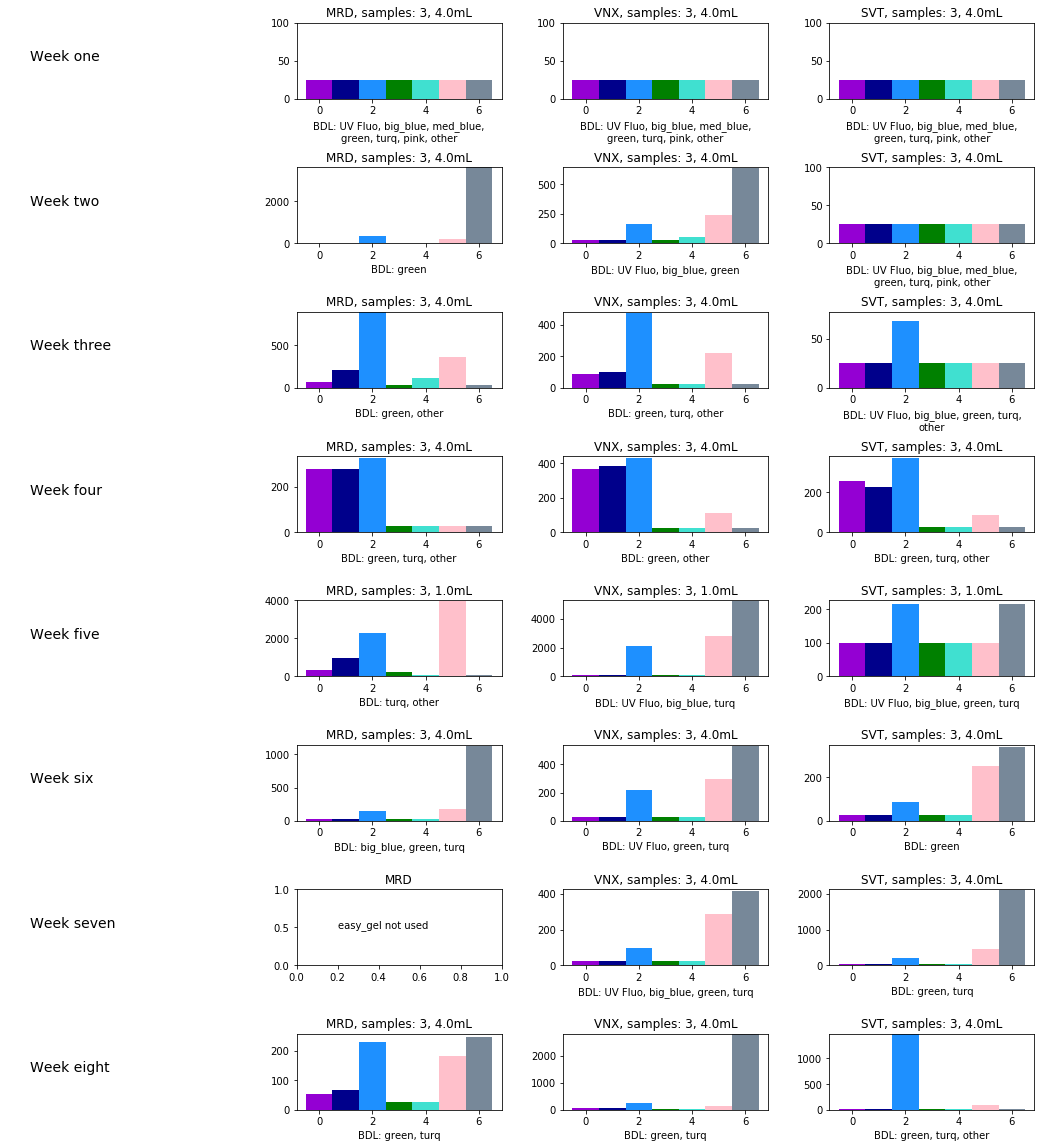

In [71]:
plot_ez_totals(four_eight, 'flu_grid_95.svg', 'flu_grid_95.png')

## 2017 EZ Gel AVERAGE colony counts, 48hr including UV fluo

### The UV is the violet bar at the begining
### BDL = 'Below detectable limit', TMTC = 'Too many to count'

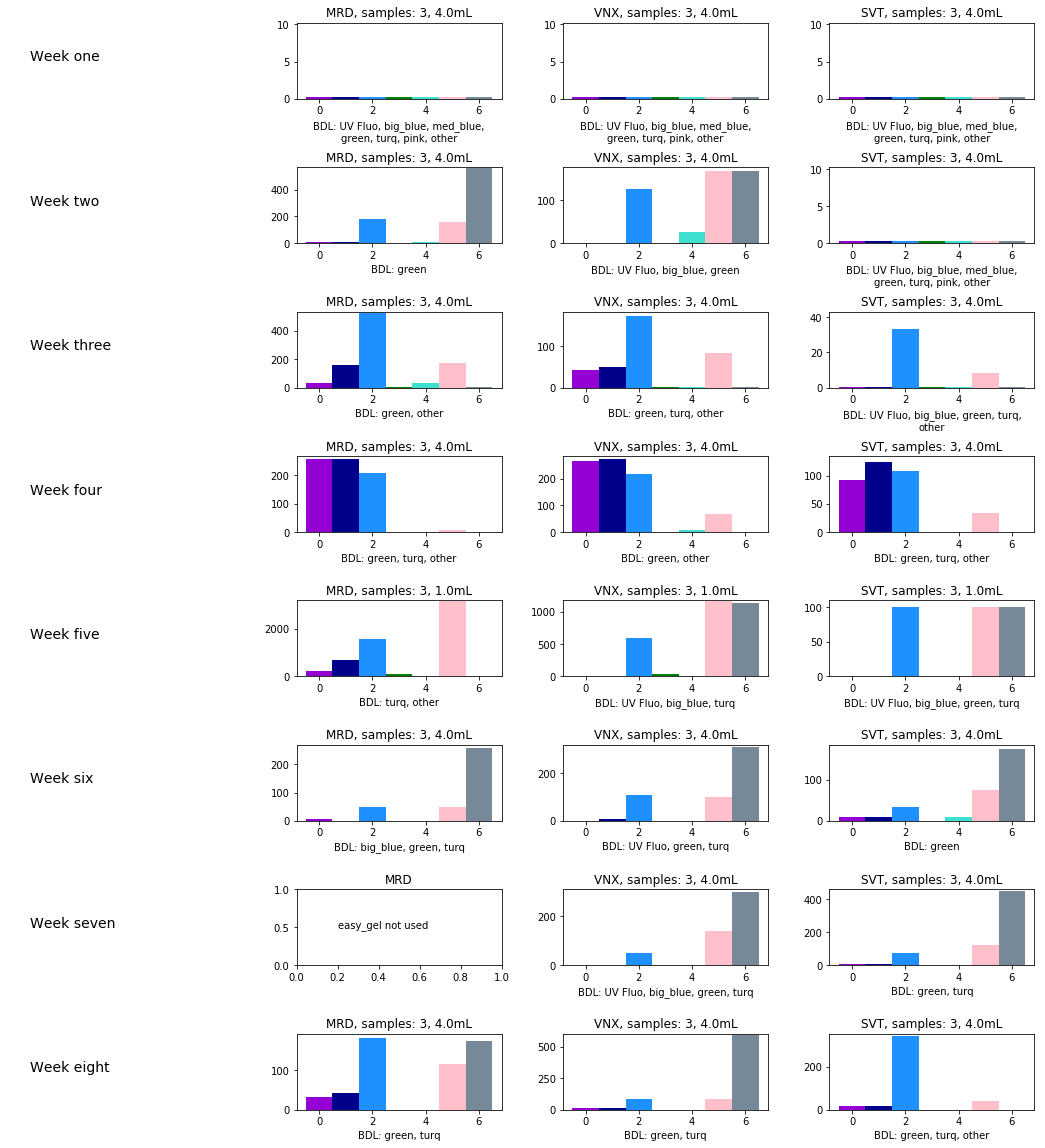

In [72]:
plot_ez_totals(four_eight_ave, 'x.svg','x.png' )

## 2016 EZ Gel AVERAGE colony counts, 24hr 

### BDL = 'Below detectable limit', TMTC = 'Too many to count'

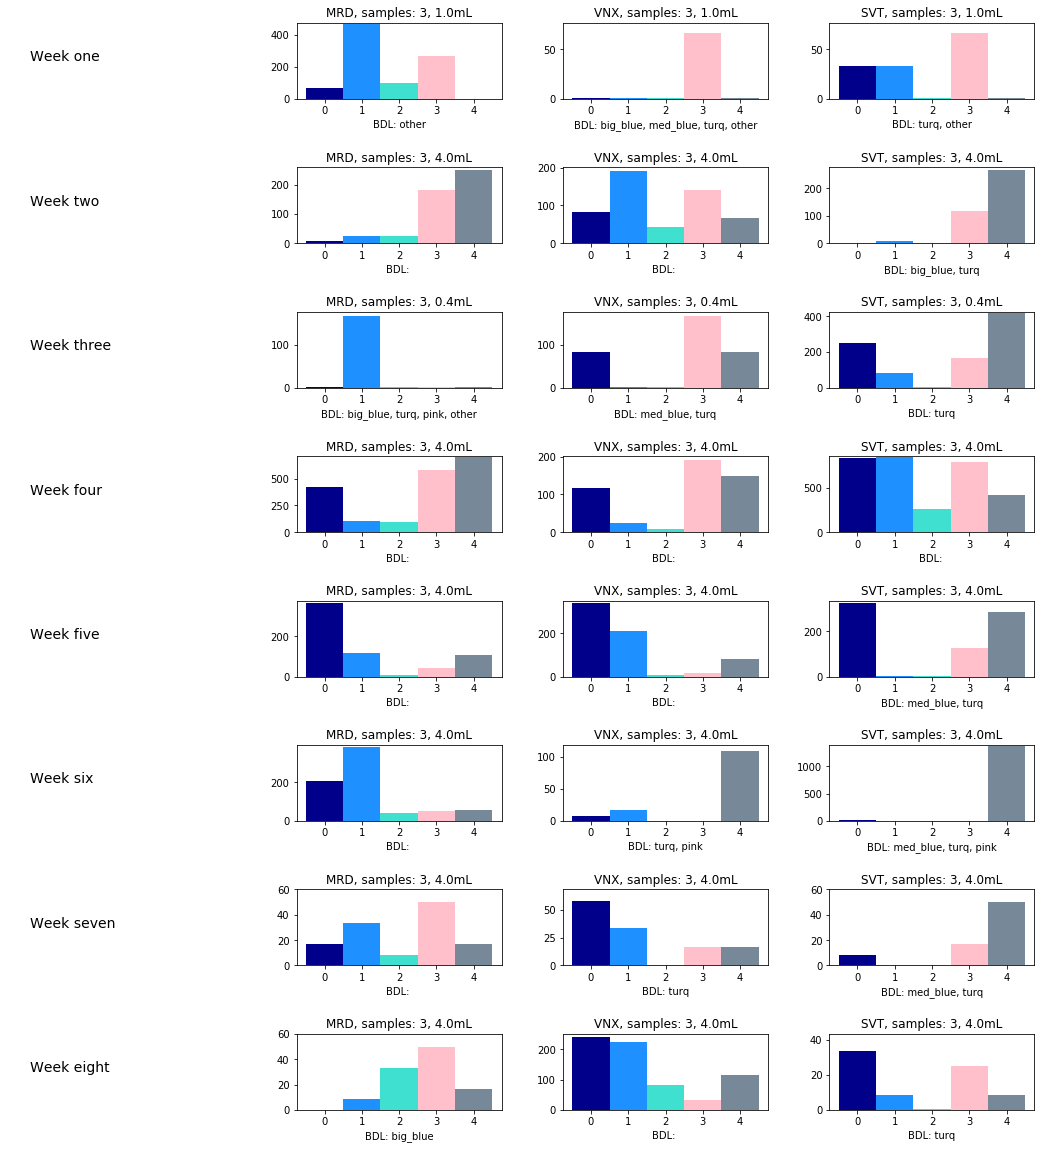

In [73]:
plot_ez_totals_2016(two_four_2016, 'grid_2016.png', 'grid_2016.svg')

### Format the output to plot combined weekly averages, total coliforms and total E.coli

#### Format for total combined colony counts

In [74]:
# so to get the average weekly total of all colony foriming units
# I will add up the averages of the individual colors(already calculated to make the average grid)
# and we will grab only the coliforms --- using UV for big_blue

def total_cfu(c, v, q):
    # c = list of the weeks of the study 'Week one', 'Week two' ....
    # v = list of the locations indentified for summary
    # q = the results from the grid layout fundtion
    # place to store the results
    b = {}
    # go through the locations one after another
    for n, x in enumerate(v):
        # place to store interim results
        e = []
        # go through the results of each location, week by week
        for i, w in enumerate(c):
            # q[n][v[n]][i][0][w] translates to
            # four_eight_ave[0][places_48[0][0][0]['Week one']]
            # if this was the first location through the function
            a = q[n][v[n]][i][0][w]
            if type(a) == dict:
                # if there is no value or it is 'bdl'
                # take the average of the current results and append to e
                # uneasonable to think that the result would be zero
                d=np.mean(e)
            else:
                # if the result is anything else sum it up
                # this is the list of results for the bar charts
                d = sum(a)
            # take d and put it in e
            e.append(d)
        # get the standard deviation
        f = np.std(e)
        # make a string to indentify the std
        # this will be component of the error bars
        string = x + '_std'
        # put all of that in a dict so it acan be called in a plotting function
        b.update({x:e, string:f})
    
    return b


#### Format the data for total coliforms

In [75]:
# will have to modify the fucntion a little to grab the 1st (uv) and 3rd element of the list
# something like this:
# four_eight_ave[2]['SVT'][3][0][weeks_l[3]][0:3:2]
# [0:3:2] <-- this last bit means from items 0:3 grab every other item (not including 3)
# and we have to account for the fact that whate ever is coming down may not be a list
def total_coli(c, v, q):
    b = {}
    for n, x in enumerate(v):
        e = []
        for i, w in enumerate(c):        
            if type(q[n][v[n]][i][0][w]) == list:
                a = q[n][v[n]][i][0][w][1:3]
                d = sum(a)
            elif type(q[n][v[n]][i][0][w]) == dict:
                d=np.mean(e)
            e.append(d)
        f = np.std(e)
        string = x + '_std'
        b.update({x:e, string:f})
        #print(b)
    
    return b


#### Format the data for total e.coli

In [143]:
# will have to modify the fucntion a little to grab the 1st (uv) and 3rd element of the list
# something like this:
# four_eight_ave[2]['SVT'][3][0][weeks_l[3]][0:3:2]
# [0:3:2] <-- this last bit means from items 0:3 grab every other item (not including 3)
# and we have to account for the fact that whate ever is coming down may not be a list
def total_ecoli(c, v, q):
    b = {}
    for n, x in enumerate(v):
        e = []
        for i, w in enumerate(c):        
            if type(q[n][v[n]][i][0][w]) == list:
                a = q[n][v[n]][i][0][w][:1]
                print(a)
                d = np.sum(a)
            elif type(q[n][v[n]][i][0][w]) == dict:
                d=np.mean(e)
            e.append(d)
        f = np.std(e)
        string = x + '_std'
        b.update({x:e, string:f})
        #print(b)
    
    return b

#### Format the data for total E.coli 2016
#### The 2016 data does not have UV so need to change the index call

In [77]:
def total_ecoli_16(c, v, q):
    b = {}
    for n, x in enumerate(v):
        e = []
        for i, w in enumerate(c):        
            if type(q[n][v[n]][i][0][w]) == list:
                a = q[n][v[n]][i][0][w][:1]#<---- changed
                d = np.mean(a)
            elif type(q[n][v[n]][i][0][w]) == dict:
                d=np.mean(e)
            e.append(d)
        f = np.std(e)
        string = x + '_std'
        b.update({x:e, string:f})
        #print(b)
    
    return b

#### Format the 24 hour data to be plotted, by running it through fn(forty_eight_av)

In [78]:
two_four_ave = forty_eight_av(a24, weeks_l, places_48, mediums[0],'Comments_p1_24h', one_plate_24, two_plate_24, three_plate_24, colony_map_24)

#### Format the data to run through the plot functions

In [79]:
cfus_week=total_cfu(weeks_l, places_48,four_eight_ave)

In [80]:
coliforms_week=total_coli(weeks_l, places_48,four_eight_ave)

In [144]:
ecoli_24 = total_ecoli(weeks_l, places_48, two_four_ave)

[0.25]
[8.333333333333332]
[33.33333333333333]
[258.33333333333337]
[233.33333333333334]
[8.333333333333332]
[33.33333333333333]
[0.25]
[0.25]
[41.66666666666667]
[266.66666666666663]
[1.0]
[0.25]
[0.25]
[16.666666666666664]
[0.25]
[0.25]
[0.25]
[91.66666666666666]
[1.0]
[8.333333333333332]
[8.333333333333332]
[16.666666666666664]


In [82]:
e_coli_2016 = total_ecoli_16(weeks_l, places_48,two_four_2016 )

In [83]:
cfu_week_2016 = total_cfu(weeks_l, places_48,two_four_2016)

In [84]:
e_coli_2016 

{'MRD': [66.66666666666666,
  8.333333333333332,
  2.5,
  425.0,
  366.66666666666663,
  208.33333333333334,
  16.666666666666664,
  0.25],
 'MRD_std': 163.38287905796872,
 'SVT': [33.33333333333333,
  0.25,
  250.0,
  841.6666666666666,
  325.0,
  16.666666666666664,
  8.333333333333332,
  33.33333333333333],
 'SVT_std': 272.63054797675215,
 'VNX': [1.0,
  83.33333333333334,
  83.33333333333333,
  116.66666666666667,
  341.66666666666663,
  8.333333333333332,
  58.333333333333336,
  241.66666666666666],
 'VNX_std': 110.10776760116022}

#### make a simple plotter

In [85]:
def simple_plot(arange, values, places, xtiks):
    fig, ax = plt.subplots(figsize=(9,5))
    x = np.arange(arange)
    y = values
    for i, n in enumerate(places):
        string = n + '_std'
        std = y[string]
        ratio = std/max(y[n])
        for j, o in enumerate(x):
            ax.errorbar(x[j], y[n][j], yerr=y[n][j]*ratio )
        ax.plot(x, y[n])
        plt.xticks(x, xtiks)
    plt.show()

In [86]:
som_col=['darkviolet','darkblue', 'dodgerblue', 'green', 'forestgreen', 'springgreen' ]
def simple_plot_2(arange, values, values2, places, xtiks, color):
    fig, ax = plt.subplots(figsize=(9,5))
    x = np.arange(arange)
    y = values
    yi = values2
    for i, n in enumerate(places):
        ax.plot(x, y[n], label = n + ' 2016', color=color[i])
    #ax2=ax.twinx()
    for j, o in enumerate(places):
        ax.plot(x, yi[o], label = o + ' 2017', color=color[j+3])
        ax.scatter(1.5, 300)
    ax.axvspan(1.42, 3.7, color='red', alpha=0.1)
    ax.axvspan(2.4, 4.58, color='blue', alpha=0.9)
   
    
#     ax3 = ax2.twiny()
#     ax3.set_xlim(left='2017-06-12', right='2017-08-09')
    ax.set_xticks(x, xtiks)
#     ax2.set_xticks(x, xtiks)
    fig.legend()
    plt.xticks(x, xtiks)
    plt.show()

In [87]:
# july 1 2016 - july 16 2016 - 0628
# june 30 2017 - july 15 2017 - 0626

In [88]:
b

[Timestamp('2017-06-12 00:00:00'),
 Timestamp('2017-06-19 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-17 00:00:00'),
 Timestamp('2017-07-24 00:00:00'),
 Timestamp('2017-07-31 00:00:00')]

In [89]:
b_2016

[Timestamp('2016-06-21 00:00:00'),
 Timestamp('2016-06-28 00:00:00'),
 Timestamp('2016-07-05 00:00:00'),
 Timestamp('2016-07-12 00:00:00'),
 Timestamp('2016-07-19 00:00:00'),
 Timestamp('2016-07-26 00:00:00'),
 Timestamp('2016-08-02 00:00:00'),
 Timestamp('2016-08-09 00:00:00')]

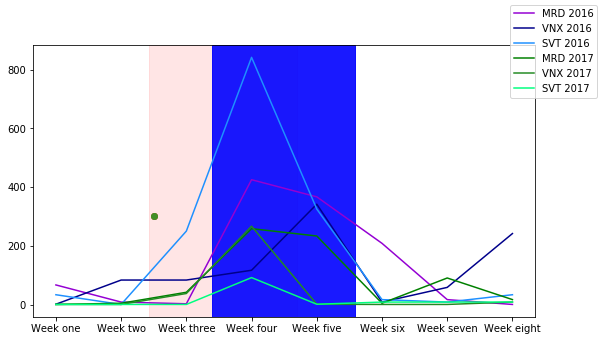

In [90]:
simple_plot_2(8, e_coli_2016, ecoli_24,places_48, weeks_l, som_col )

## Plots of weekly averages, CFU and Coliforms
### Using the standard deiviation alone would cause error bars that are greater than some daily averages
### There are a couple reasons:
1. There is a lot of error
2. Pulling the standard deviation from a dist that is not normalluy distributed
3. *Pulling the standard deviation from a small sample
3. Two options: transform to normal(log, sqrt...), use the ratio of std dev/max value as a ration

### * There are 

### example: take the max value for a given location divide the standard deviation by the max value, see lines 6, 7 and 8 in the function above
### That gives you a ratio of error proportional to the reslults... this is appropriate
### The assumption is that as the value gets greater so does the error, so catch it at its greatest value


## Start with some simple plots to get the geometry right:

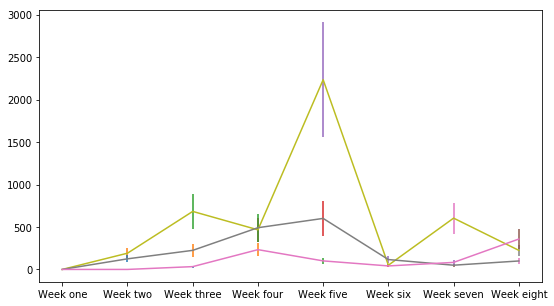

In [91]:
#<------- Average total coliforms per week ----------->
simple_plot(8, coliforms_week,places_48,weeks_l )

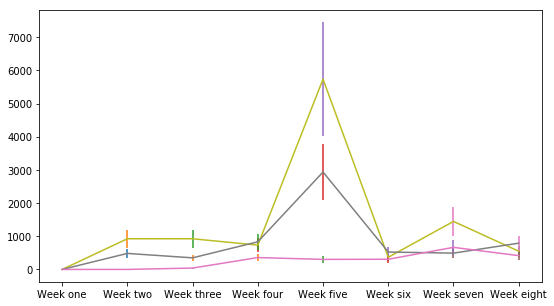

In [92]:
#<----------- Average total CFUS per week EZ_Gel ---------->

simple_plot(8, cfus_week, places_48, weeks_l)

### This is where the rain data needs to be integrated
### The dates serve two purposes one: 
1. The xaxis value for rain
2. The date group for average values
3. The data is grouped by 1-Location, 2-Week number
4. So we need the dates in a form to locate the values on the xaxis
5. And call the appropriate data from our previous function calls

#### good thing that the dates are mapped to week number already
#### in sum:
1. put it in a form that can be use by the plot functions below
2. or (worst case) modify the plot functions to incorporate the rain data


In [93]:
# take a look at the data that is being out put
#coliforms_week
# there is no date in the output
# the data grouping was set in the prep fucntion
# we know that each value in the list is equal to a day
# so maybe something like this:
# so we should be bale to map date to value using some previously defined variables
print(len(coliforms_week['MRD']), len(b))
# at least the there are an equal amount of daily results as there are days

8 8


### 2017 Rain data

#### make a list of all the dates in the rain data

In [94]:
date_list = list(d_rain['real_date'].dt.strftime('%Y-%m-%d'))

#### from the seventh day on the list, grab every seven days

In [95]:
print(date_list[7::7])

['2017-06-12', '2017-06-19', '2017-06-26', '2017-07-03', '2017-07-10', '2017-07-17', '2017-07-24', '2017-07-31']


#### get only the date range we need from the rain data

In [96]:
d_rain_x = d_rain.iloc[7:].copy()
d_rain_x['Rain'] = d_rain_x['Rain']*2.54
d_rain_x.rename(columns ={'real_date':'Date'}, inplace=True)
#d_rain_x.iloc[:10]

### 2016 Rain data

In [97]:
rain_2016.iloc[:5]
rain_2016['Date'] = pd.to_datetime(rain_2016['Date'])

In [98]:
date_list_2016 = [x.strftime('%Y-%m-%d') for x in b_2016]
#date_list_2016

#### integrate into the simple plot

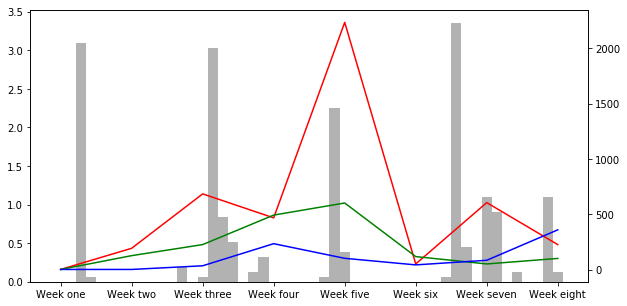

In [99]:
def rain_plot():
    collss = ['r', 'g', 'b']
    locs = date_list[7::7]
    labels = weeks_l
    fig, ax1 = plt.subplots(figsize=(10,5))
    x_one = d_rain_x['Date']
    y_one = d_rain_x['Rain']
    ax1.bar(x_one, y_one.values*2.54, width=1, color='black', alpha=0.3)
    ax2 = ax1.twinx()
    for i, n in enumerate(places_48):
        x_two = b
        y_two = coliforms_week[n]
        ax2.plot(x_two, y_two, color=collss[i])

    plt.xticks(locs, labels)   
    plt.show()
rain_plot()

In [100]:
# notice how the zero on the yaxis does not line up
# fix that by changing the order the data is called and
# setting ylim to zero ... see below

## Okay the CSO is good with the output, now we can prettify
1. Take care of the legend
2. Assign colors to location
3. Format the plot lines and error bars
4. Format the grid
5. Make x and y axis labels
6. Title, subtitle
7. Annotations



In [101]:
import matplotlib.ticker
def not_simple_plot(arange, values, datelist, ticklocs, places,rain, xtiks,sup_title, title, filename):
    collss=['darkred', 'darkslategray', 'teal']
    nticks = 8
    fig, ax2 = plt.subplots(figsize=(10,6), edgecolor='midnightblue')
    x = datelist
    y = values
    locs = ticklocs
    labels = weeks_l
    x_one = rain['Date']
    y_one = rain['Rain']
    ylim = [1]
    for i, n in enumerate(places):
        string = n + '_std'
        std = y[string]
        ratio = std/max(y[n])
        for j, o in enumerate(x):
            t, c, j = ax2.errorbar(x[j], y[n][j], yerr=y[n][j]*ratio, capsize=2, alpha=0.4, ecolor='magenta',)
            for k in j:
                k.set_linestyle('--')
            for cap in c:
                cap.set_marker("o")
        ax2.plot(x, y[n], label=n, color=collss[i], linewidth=3)
        if max(y[n]) > max(ylim):
            ylim.append(max(y[n]))
        ax2.set_ylim(bottom=0, top=max(ylim)+100)
    ax1 = ax2.twinx() 
    ax1.bar(x_one, y_one.values, width=1, color='b', alpha=0.2, label="cm of rain")
      
    ax1.spines['bottom'].set_color('midnightblue')
    ax1.spines['top'].set_color('midnightblue')
    ax1.spines['left'].set_color('midnightblue')
    ax1.spines['right'].set_color('midnightblue')
    ax1.grid(which='major', color='midnightblue', linestyle='--', alpha=0.2, axis='y')
    ax1.tick_params(axis='both', which='both', color='midnightblue')
    ax1.set_ylabel('Centimeters of rain per day', labelpad=10, fontsize=14)
    #ax1.set_ylim(top=max(ylim))
    
    ax2.set_ylabel('Colony forming units per 100mL', labelpad=10, fontsize=14)
    fig.legend( loc=(0.74, 0.55), frameon=True, fontsize=12, edgecolor='midnightblue', framealpha=0.8 )
    
    #plt.ylim(ymax=max(ylim))    
    plt.xticks(locs, labels, fontsize=11, )
    plt.suptitle(sup_title, fontsize=16, family='sans')
    plt.title(title, fontsize=16, family='sans', y=1.03)
    plt.subplots_adjust(top=0.85)
    plt.savefig(filename)
    
    
    plt.show()

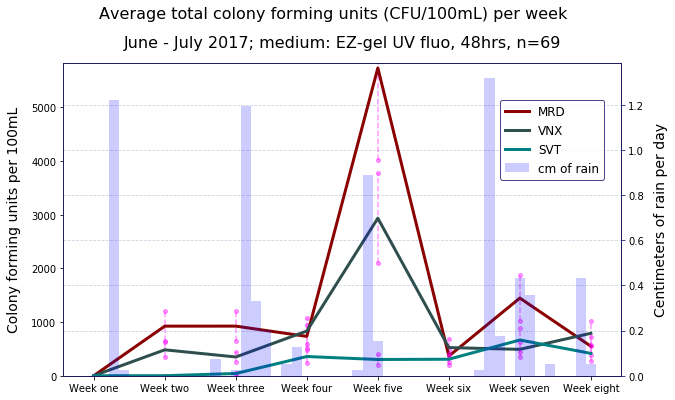

In [102]:
not_simple_plot(8, cfus_week,b,  date_list[7::7], places_48,d_rain_x, weeks_l, 'Average total colony forming units (CFU/100mL) per week', 'June - July 2017; medium: EZ-gel UV fluo, 48hrs, n=69', 'cfu_week.png')

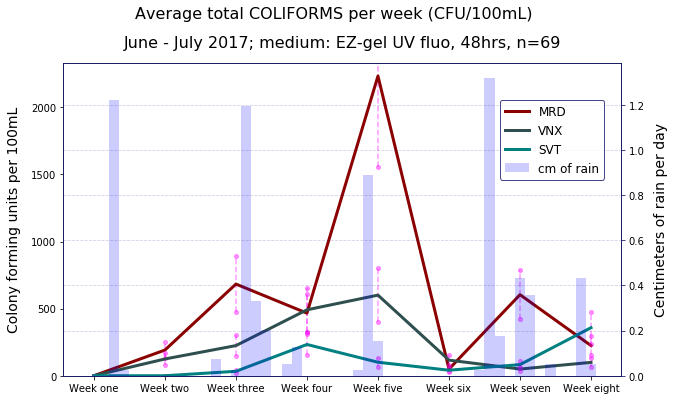

In [103]:
not_simple_plot(8,  coliforms_week,b, date_list[7::7], places_48,d_rain_x, weeks_l, 'Average total COLIFORMS per week (CFU/100mL)','June - July 2017; medium: Easygel+, 48hrs, n=69', 'coli_form_week.png' )

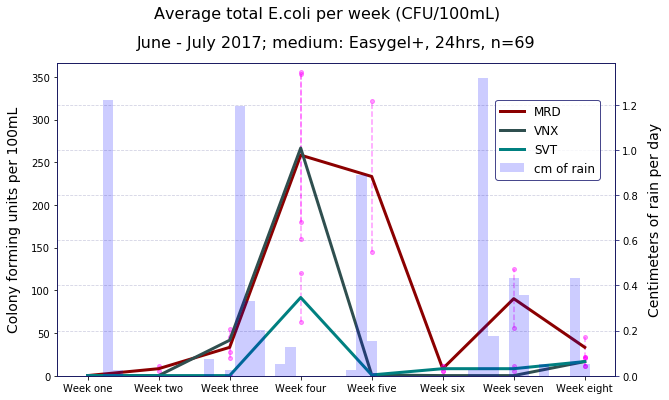

In [147]:
not_simple_plot(8,  ecoli_24,b, date_list[7::7], places_48, d_rain_x, weeks_l, 'Average total E.coli per week (CFU/100mL)','June - July 2017; medium: Easygel+, 24hrs, n=69', 'e_coli_week.png')

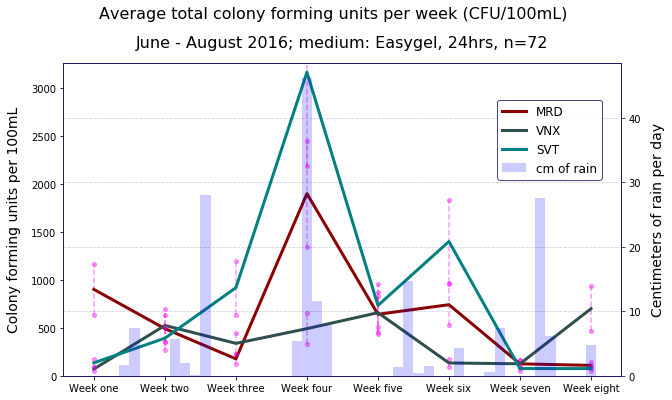

In [146]:
not_simple_plot(8, cfu_week_2016,b_2016, date_list_2016, places_48, rain_2016, weeks_l, 'Average total colony forming units per week (CFU/100mL)','June - August 2016; medium: Easygel, 24hrs, n=72', 'total_cfu_2016.png')

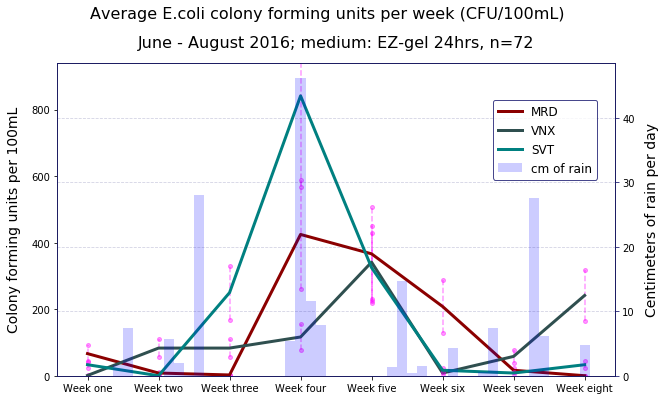

In [106]:
not_simple_plot(8, e_coli_2016,b_2016, date_list_2016, places_48, rain_2016, weeks_l, 'Average E.coli colony forming units per week (CFU/100mL)','June - August 2016; medium: EZ-gel 24hrs, n=72', 'total_ecoli_2016.png')

## ------------------ Legacy code before meeting with the CSO ----------------------------------
### Below are  the charts and grids created before meeting with cso
#### The idea is to give a vision of all the results to the CSO, discuss the results and help choose the best option for reporting
#### This is also the first 'run' at consolidating the information and identifying errors


In [107]:
# So there are alot of columns here
# index will be
# 'Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation',
# I want that with each record for now

plate_one = ['P1_qty_sample',
             'Image_24h_fluo_plate_one',
             'P1_fluo_halo_colonies',
             'P1_fluo_other',
             'Plate_one_24h_image',
             'P1_24h_big_blue',
             'P1_24h_med_blue',
             'P1_24h_green',
             'P1_24h_turq',
             'P1_24h_pink',
             'P1_24h_other',
             'Comments_p1_24h',
             'Plate_one_48h_image',
             'P1_48h_big_blue',
             'P1_48h_med_blue',
             'P1_48h_green',
             'P1_48h_turq',
             'P1_48h_pink',
             'P1_48h_other',
             'Comments_p1_48h']

In [108]:
plate_two = ['P2_qty_sample',
             'Image_24h_fluo_plate_two',
             'P2_fluo_halo_colonies',
             'P2_fluo_other',
             'Plate_two_24h_image',
             'P2_24h_big_blue',
             'P2_24h_med_blue',
             'P2_24h_green',
             'P2_24h_turq',
             'P2_24h_pink',
             'P2_24h_other',
             'Comments_p2_24h',
             'Plate_two_48h_image',
             'P2_48h_big_blue',
             'P2_48h_med_blue',             
             'P2_48h_green',
             'P2_48h_turq',
             'P2_48h_pink',
             'P2_48h_other',
             'Comments_p2_48h']

In [109]:
plate_three = ['P3_qty_sample',
               'Image_24h_fluo_plate_three',
               'p3_fluo_halo_colonies',
               'p3_fluo_other',
               'Plate_three_24h_image',
               'P3_24h_big_blue',
               'P3_24h_med_blue',
               'P3_24h_green',
               'P3_24h_turq',
               'P3_24h_pink',
               'P3_24h_other',
               'Comments_p3_24h',
               'Plate_three_48h_image',
               'P3_48h_big_blue',
               'P3_48h_med_blue',
               'P3_48h_green',
               'P3_48h_turq',
               'P3_48h_pink',
               'P3_48h_other',
               'Comments_p3_48h'] 

In [110]:
map_it = ['Location','latitude', 'longitude']

In [111]:
index = ['Date',
         'Location',
         'medium',
         'Samples',
         'Sampling_Notes',
         'Water_temp',
         'Plating_notes',
         'Temp_incubation',]

In [112]:
# so the info repeats it self for each plate
# set up lists and variables to keep track of all that
# make sure that all the column names are accounted for
# we have yet to account for 'location_image'
def count_it(a):
    n = 0
    for x in a:
        a = len(x)
        n += a
    return n
groups = [index, map_it, plate_one, plate_two, plate_three]
print(count_it(groups), len(a_cols))
# the count works because the column 'location image' is not included

71 71


In [113]:
loc_image = ['Date', 'Location', 'Location_Image']
groups.append(loc_image)
print(count_it(groups), len(a_cols))
#should be plus three

74 71


In [114]:
# okay onwards
# break the results into time scale (beacuase i can)
# the info repeats it self
# this should get dwon to a series of lists
# if executed in right sequence as variables 
# will extract all possible combinations of the data provided
plate_one_24 = ['P1_qty_sample',
                'Plate_one_24h_image',
                'P1_24h_big_blue',
                'P1_24h_med_blue',
                'P1_24h_green',
                'P1_24h_turq',
                'P1_24h_pink',
                'P1_24h_other',
                'Comments_p1_24h',]
             
plate_one_48 = ['P1_qty_sample',
                'Plate_one_48h_image',
                'P1_48h_big_blue',
                'P1_48h_med_blue',
                'P1_48h_green',
                'P1_48h_turq',
                'P1_48h_pink',
                'P1_48h_other',
                'Comments_p1_48h']


In [115]:
# these can also be constructed using a list index method
plate_two_24 = ['P2_qty_sample',
                'Plate_two_24h_image',
                'P2_24h_big_blue',
                'P2_24h_med_blue',
                'P2_24h_green',
                'P2_24h_turq',
                'P2_24h_pink',
                'P2_24h_other',
                'Comments_p2_24h']

plate_two_48 = ['P2_qty_sample',
                'Plate_two_48h_image',
                'P2_48h_big_blue',
                'P2_48h_med_blue',             
                'P2_48h_green',
                'P2_48h_turq',
                'P2_48h_pink',
                'P2_48h_other',
                'Comments_p2_48h']

In [116]:
plate_three_24 = ['P3_qty_sample',
                  'Plate_three_24h_image',
                  'P3_24h_big_blue',
                  'P3_24h_med_blue',
                  'P3_24h_green',
                  'P3_24h_turq',
                  'P3_24h_pink',
                  'P3_24h_other',
                  'Comments_p3_24h',]
               
plate_three_48 = ['P3_qty_sample',
                  'Plate_three_48h_image',
                  'P3_48h_big_blue',
                  'P3_48h_med_blue',
                  'P3_48h_green',
                  'P3_48h_turq',
                  'P3_48h_pink',
                  'P3_48h_other',
                  'Comments_p3_48h']

In [117]:
plate_one_fluo = ['Image_24h_fluo_plate_one',
                  'P1_fluo_halo_colonies',
                  'P1_fluo_other']
plate_two_fluo = ['Image_24h_fluo_plate_two',
                  'P2_fluo_halo_colonies',
                  'P2_fluo_other']
plate_three_fluo = ['Image_24h_fluo_plate_three',
                    'p3_fluo_halo_colonies',
                    'p3_fluo_other']

In [118]:
# this data can be seen as a whole (the sum of all the xs or seperated by incubation time)
plate_groups = [plate_one_24, plate_two_24, plate_three_24, plate_one_48, plate_two_48, plate_three_48]
plate_24 = plate_groups[:3]
plate_48 = plate_groups[3:]

In [119]:
# the output should be the same color group from each plate for all values x[i] where i = np.random.choice(9)
check_indexes(plate_groups)
# okay this function can run forever and i get the same output from each group

P1_24h_med_blue
P2_24h_med_blue
P3_24h_med_blue
P1_48h_med_blue
P2_48h_med_blue
P3_48h_med_blue
loop


In [120]:
# makesure the orignal df is up to speed
a['Date'] = pd.to_datetime(a['Date'],format='%Y/%m/%d' )

In [121]:
# create a list of place names
places = list(a['Location'].copy())
places = set(places)
place = list(places)
place

['MRD',
 'VNX',
 'Nernier',
 'Hackuarium toilet',
 'Echandens',
 'Hackuarium tap',
 'SVT']

In [122]:
mediums = list(a['medium'].unique().copy())
mediums[0]

'easy_gel'

In [123]:
c = a[(a.Location == 'SVT') & (a.medium == 'unil_kitchen')]
c

,Date,Location,medium,Samples,Sampling_Notes,Water_temp,Plating_notes,Temp_incubation,P1_qty_sample,Image_24h_fluo_plate_one,...,P3_48h_big_blue,P3_48h_med_blue,P3_48h_green,P3_48h_turq,P3_48h_pink,P3_48h_other,Comments_p3_48h,latitude,longitude,Location_Image
43,2017-07-24,SVT,unil_kitchen,2,No comments,19,No comments,37,0.5,SVT1-13_19_6.JPG,...,0.0,0.0,0.0,0.0,0.0,0.0,No comments,46.438207,6.905157,none
57,2017-07-03,SVT,unil_kitchen,1,added oct,22,No comments,37,0.5,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
place = ['Echandens',
         'SVT',
         'VNX',
         'MRD',
         'Nernier',
         'Hackuarium tap',
         'Hackuarium toilet']

# so now I should get a table of values
# corresponding to plate number and color for one date, and one location
# check to see what happens if use 1 of each list to slice the data-frame
c = a[(a.Location == place[4]) & (a.Date == weeks['Week one'])][[plate_one_24[2], plate_two_24[2], plate_three_24[2]]]
c

,P1_24h_big_blue,P2_24h_big_blue,P3_24h_big_blue
4,1.0,0.0,0.0


In [125]:
print(type(c))
# that output looks good
# create a list index for the plate counts
bugs = [2, 3, 4, 5, 6, 7]
# this is temporary and will be replaced with a list derived from the column names
# this information down here is good to know

<class 'pandas.core.frame.DataFrame'>


In [126]:
# there is already some pandas functionality here
a_sum = c.sum()
b_sum = sum(a_sum)
c_sum = sum(c.sum())

print(c_sum)
print(a_sum)

1.0
P1_24h_big_blue    1.0
P2_24h_big_blue    0.0
P3_24h_big_blue    0.0
dtype: float64


In [127]:
plate_48 = [plate_one_48, plate_two_48, plate_three_48]

In [128]:
cc = [plate_24, plate_48]
big_blue, med_blue, green, turq, pink, other = [], [], [], [], [], []
for x in cc:
    for plate in x:        
        big_blue.append(plate[2])
        med_blue.append(plate[3])
        green.append(plate[4])
        turq.append(plate[5])
        pink.append(plate[6])
        other.append(plate[7])
#big_blue         

In [129]:
#b is our list of dates
dates = b
all_colors = [big_blue, med_blue, green, turq, pink, other]

In [130]:
one_s = [0,3]
two_s = [0,1,3,4]
second_s = [1,4]
third_s = [2, 5]

In [131]:
def make_samples(x,y):
    d = []
    for i, a in enumerate(x):
        color = []
        for n, b in enumerate(y):
            c = x[i][b]
            color.append(c)
        d.append(color)
    return d
one_sample = make_samples(all_colors, one_s)
two_sample = make_samples(all_colors, two_s)
second_sample = make_samples(all_colors, second_s)
third_sample = make_samples(all_colors, third_s)
# all_colors is for three samples
#samp_one   

In [132]:
# will go ahead and make dictionaries for the variables
# easier to use than remembering abbreviations
#mediums
med_keys = ['ez', 'card', 'unil', 'lev']
medium = dict(zip(med_keys, mediums))
place_keys = ['ech', 'svt', 'vnx', 'mrd', 'ner', 'tap', 'toilet']
places = dict(zip(place_keys, place))

In [133]:
# so should be able to call the row week two, for one sample(plate one), any place, any plate number
a[(a.Date == weeks['Week five']) & (a.Location == places['vnx']) & (a.medium == medium['card'])][all_colors[5]]

,P1_24h_other,P2_24h_other,P3_24h_other,P1_48h_other,P2_48h_other,P3_48h_other
61,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
#all_colors

In [135]:
import re
p = re.compile('tmtc', re.IGNORECASE)
def weekly_results(df, week, places, meds):
    all_results2 = []
    for n, place in enumerate(places):
        print(place)
        chart_it2 = {place:[]}
        the_results2 = []
        for a, b in enumerate(week):
            e = df[(df.Date == weeks[week[a]]) & (df.Location == place) & (df.medium == medium[meds])]
            
            if e['Samples'].values.size == 0:
                no_t = medium[meds] + ' not used'
                no_test = {'no_test': no_t}
                the_results2.append([{weeks_2[weeks[b]]:no_test}]) 
                
            elif e['Samples'].values[0] == 1:
                samples = one_sample
                num_samps = 1       
                
            elif e['Samples'].values[0] == 2:
                samples = two_sample
                num_samps = 2
                            
            elif e['Samples'].values[0] == 3:
                samples = all_colors
                num_samps = 3
            
            if e['Samples'].values.size > 0:
                comments = list(e['Comments_p1_24h'])
                samps = {'num samps': num_samps}
                dose = {'dilution': e[plate_one[0]].item()}
                if len(comments) ==1:
                    
                    if p.search(comments[0]):
                        bdl={'TMTC':''}
                    else:
                        bdl={'BDL':''}
                
                day_results2 = []
                string = []
                for c, d in enumerate(samples):
                    f = e[d]
                    
                    if sum(f.sum()) == 0:
                        for s in d:
                            if d[0][7:] not in string:
                                string.append(d[0][7:])
                    
                    bdl[list(bdl.keys())[0]] = ', '.join(string)
                    g = list(e[d].sum())
                    g_l = []
                    for h in g:
                        if h == 0:
                            g_l.append(h)
                        if h > 0:
                            g_l.append(np.log(h))
                    g_m = np.mean(g_l)
                    g_s = np.std(g_l)
                    f_95 = g_m+ g_s*1.649
                    f_95 = np.exp(f_95).round(2)
                    if e[plate_one[0]].item() == 0.5:
                        f_95 = f_95 * 200
                    elif e[plate_one[0]].item() == 1:
                        f_95 = f_95 * 100
                    elif e[plate_one[0]].item() == 4:
                        f_95 = f_95 * 25
                    day_results2.append(f_95)
                the_results2.append([{weeks_2[weeks[b]]:day_results2}, bdl, samps, dose])
            chart_it2[place] = the_results2
        all_results2.append(chart_it2)
    
    return all_results2
               
                
all_s = weekly_results(a, weeks_l, place[:4], 'ez')  

Echandens
SVT
VNX
MRD


In [136]:
from textwrap import wrap
def plot_weekly_totals(x, pngtitle, svgtitle):
    rows = len(weeks_l)
    cols = len(x) +1
    ind = np.arange(6)
    width = 1
    colss = ['darkblue', 'dodgerblue', 'green', 'turquoise', 'pink', 'lightslategray']

    f, axar = plt.subplots(rows, cols, figsize=(18,20))
    f.subplots_adjust(hspace=0.9, wspace=0.3)

    for i, n in enumerate(x):
        if i == 0:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    axar[j, i].text(0, 0.5, weeks_l[j], fontsize=14)
                    axar[j, i].set_axis_off()
                    if type(k[0][weeks_l[j]]) == dict:
                        axar[j, i+1].text(0.2, 0.5, k[0][weeks_l[j]]['no_test'], fontsize=10)
                        axar[j, i+1].set_title(key)
                        
                    else:
                        axar[j, i+1].bar(ind, k[0][weeks_l[j]], width, color=colss)
                        axar[j, i+1].set_title(key + ', samples: ' + str(list(k[2].values())[0]) + ', ' + str(list(k[3].values())[0]) + 'mL')
                        axis_label = '\n'.join(wrap(list(k[1].values())[0], 24))
                        axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                        if max(k[0][weeks_l[j]]) == 25:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                        else:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
        else:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    if type(k[0][weeks_l[j]]) == dict:
                        axar[j, i+1].text(0.2, 0.5, k[0][weeks_l[j]]['no_test'], fontsize=10)
                        axar[j, i+1].set_title(key)
                       
                    else:
                        axar[j, i+1].bar(ind,  k[0][weeks_l[j]],width, color=colss)
                        axar[j, i+1].set_title(key + ', samples: ' + str(list(k[2].values())[0]) + ', ' + str(list(k[3].values())[0]) +'mL')
                        axis_label = '\n'.join(wrap(list(k[1].values())[0], 24))
                        axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                        if max(k[0][weeks_l[j]]) == 25:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                        else:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
                    
    plt.savefig(pngtitle)
    plt.savefig(svgtitle)
    plt.show()

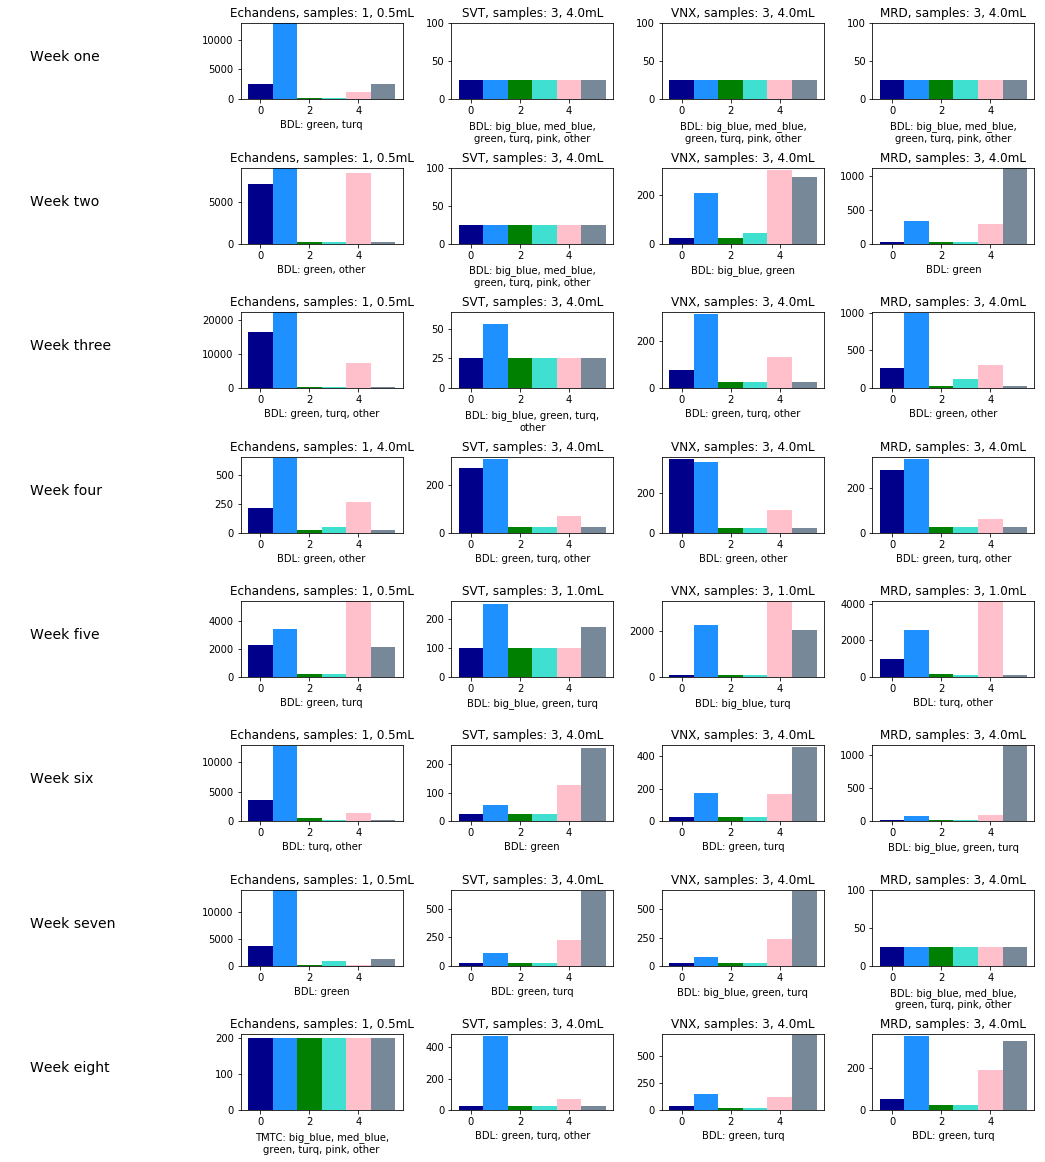

In [137]:
plot_weekly_totals(all_s, 'all_locs_95.png', 'all_locs_95.svg')

In [138]:
all_results = []
import re
p = re.compile('tmtc', re.IGNORECASE)
for n, beach in enumerate(place[:4]):
    chart_it = {beach:[]}
    the_results = []
    for i, date in enumerate(dates):        
        zz = a[(a.Date == date) & (a.Location == beach ) & (a.medium == 'easy_gel')]
        comments = list(zz['Comments_p1_24h'])
        if len(comments) ==1:
            if p.search(comments[0]):
                bdl={'TMTC':''}
            else:
                bdl={'BDL':''}
        day_results = []
        string = []
        for n, sample in enumerate(all_colors):
            qi = zz[sample]
            if sum(qi.sum()) == 0:
                for s in sample:
                    if sample[0][7:] not in string:
                        string.append(sample[0][7:])
            bdl[list(bdl.keys())[0]] = ', '.join(string)
            yy = list(zz[sample].sum())
            yr = []
            for d in yy:
                if d == 0:
                    yr.append(d)
                if d > 0:
                    yr.append(np.log(d))
            yg = np.mean(yr)
            yh = np.std(yr)
            f_95 = yg+yh*1.649
            f_95 = np.exp(f_95).round(2)
            if zz[plate_one[0]].item() == 0.5:
                f_95 = f_95 * 200
            elif zz[plate_one[0]].item() == 1:
                f_95 = f_95 * 100
            elif zz[plate_one[0]].item() == 4:
                f_95 = f_95 * 25
            day_results.append(f_95) 
        the_results.append([{weeks_2[date]:day_results}, bdl])        
    chart_it[beach] = the_results
    all_results.append(chart_it)

In [139]:
from textwrap import wrap
def plot_weekly_totals_2(x):
    rows = len(weeks_l)
    cols = len(x) +1
    ind = np.arange(6)
    width = 1
    colss = ['darkblue', 'dodgerblue', 'green', 'turquoise', 'pink', 'lightslategray']

    f, axar = plt.subplots(rows, cols, figsize=(18,20))
    f.subplots_adjust(hspace=0.9, wspace=0.3)

    for i, n in enumerate(x):
        if i == 0:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    axar[j, i].text(0, 0.5, weeks_l[j], fontsize=14)
                    axar[j, i].set_axis_off()
                    axar[j, i+1].bar(ind, k[0][weeks_l[j]], width, color=colss)
                    axar[j, i+1].set_title(key)
                    axis_label = '\n'.join(wrap(list(k[1].values())[0], 24))
                    axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                    if max(k[0][weeks_l[j]]) == 25:
                        axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                    else:
                        axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
        else:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    axar[j, i+1].bar(ind,  k[0][weeks_l[j]],width, color=colss)
                    axar[j, i+1].set_title(key)
                    axis_label = '\n'.join(wrap(list(k[1].values())[0], 24))
                    axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                    if max(k[0][weeks_l[j]]) == 25:
                        axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                    else:
                        axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
                    
plt.show()

## Results aggregated easy gel -- all plates
### 95th percentile -- P95 = mean + std*1.649
#### if a chart is bumped up against a limit that means the results are less than the detectable limit ie... week one: (SVT,VNX,MRD) for that dilution or TMTC ie.. week eight Echandens --- the reslult was given as zero in the file


### BDL = 'Below detectable limit', TMTC = 'Too many to count'
#### The color and whether BDL or TMTC  is noted on the X-Axis label



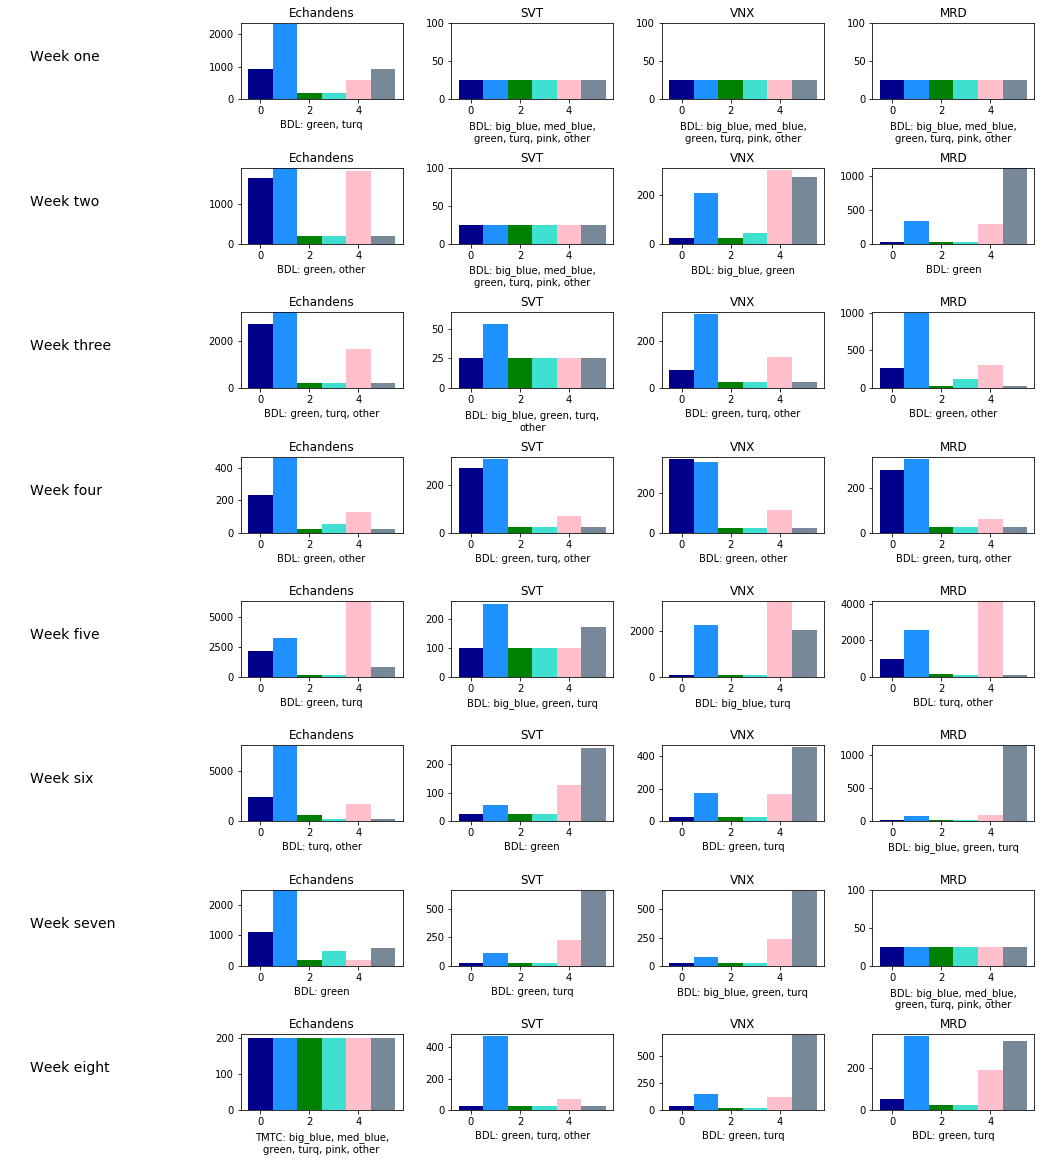

In [140]:
plot_weekly_totals_2(all_results)